Climate App

In [2]:
#Import Dependencies
from flask import Flask, jsonify
import pandas as pd
import datetime as dt
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first().date

'2010-01-01'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Calculate the date one year from the last date in data set.
earlier_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
earlier_year

datetime.datetime(2016, 8, 23, 0, 0)

In [11]:
# Perform a query to retrieve the data and precipitation scores
precp_scores = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= earlier_year).\
                    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precp_df = pd.DataFrame(precp_scores, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
precp_df.set_index('Date', inplace = True)
precp_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<function matplotlib.pyplot.show(close=None, block=None)>

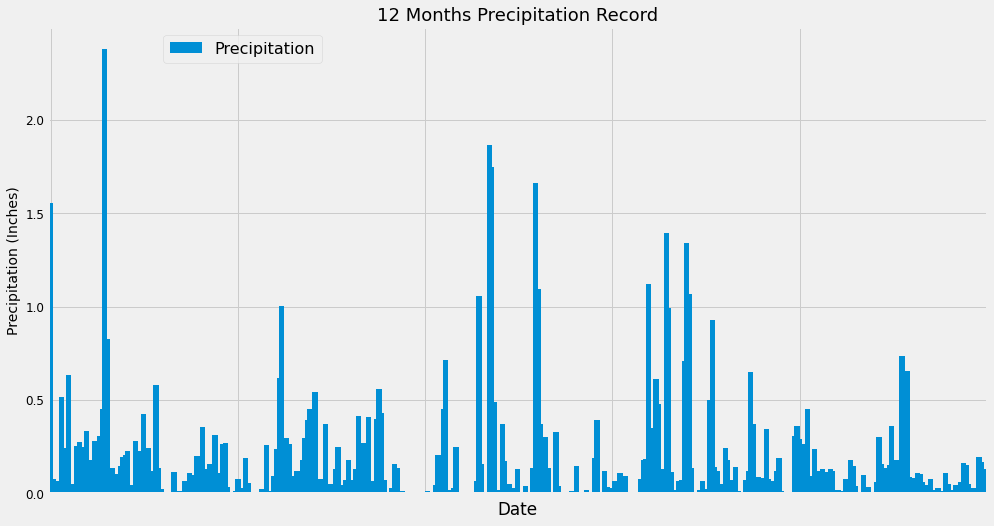

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precp_df.plot(kind='bar', width=2, figsize=(15,8))
plt.locator_params(axis='x', nbins=5)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=12)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("12 Months Precipitation Record", size=18)
plt.ylabel("Precipitation (Inches)", size=14)
plt.show

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precp_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active_station).all()

[(54.0, 71.66378066378067, 85.0)]

<function matplotlib.pyplot.show(close=None, block=None)>

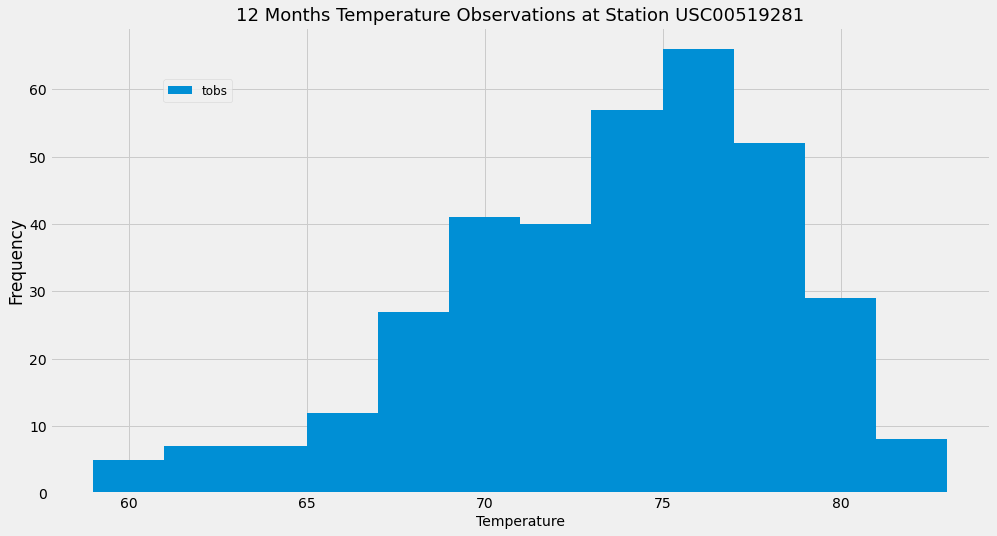

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date >= earlier_year).all()
temperature_df = pd.DataFrame(temperature)
temperature_df.set_index('station', inplace=True)
temperature_df.plot.hist(by='station', bins=12, figsize=(15,8))
plt.title("12 Months Temperature Observations at Station " + most_active_station, fontsize=18)
plt.xlabel("Temperature", fontsize=14)
plt.legend(bbox_to_anchor=(.2,.9), fontsize=12)
plt.show

# Close session

In [19]:
# Close Session
session.close()